In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
df = pd.read_csv("masked_kiva_loans.csv" , index_col=0)

### Data Exploration

In [191]:
df.head(10)

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
id,,,,,,,,,,
1242201,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1165778,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
1123052,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
1312344,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
861422,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015
864504,350,350,Agriculture,Pakistan,245.0,14,14,female,monthly,3/31/2015
1023952,200,200,Agriculture,Philippines,145.0,7,8,female,irregular,2/17/2016
690323,575,575,Agriculture,Georgia,181.0,15,20,female,monthly,3/28/2014
749263,325,325,Agriculture,Nigeria,288.0,17,13,female,bullet,8/4/2014


In [192]:
df.head(-10)

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
id,,,,,,,,,,
1242201,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1165778,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
1123052,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
1312344,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
861422,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015
...,...,...,...,...,...,...,...,...,...,...
723415,250,250,Wholesale,Kenya,138.0,5,10,female,irregular,6/11/2014
704555,1000,1000,Wholesale,Uganda,163.0,12,26,male,monthly,4/30/2014
707889,1150,1150,Wholesale,Philippines,123.0,8,45,male,irregular,5/9/2014


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33561 entries, 1242201 to 931675
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   funded_amount       33561 non-null  int64  
 1   loan_amount         33561 non-null  int64  
 2   sector              33561 non-null  object 
 3   country             33561 non-null  object 
 4   partner_id          32927 non-null  float64
 5   term_in_months      33561 non-null  int64  
 6   lender_count        33561 non-null  int64  
 7   borrower_genders    33366 non-null  object 
 8   repayment_interval  33561 non-null  object 
 9   date                33561 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.8+ MB


In [194]:
print(df.shape)

(33561, 10)


In [195]:
print(df.isna().sum())

funded_amount           0
loan_amount             0
sector                  0
country                 0
partner_id            634
term_in_months          0
lender_count            0
borrower_genders      195
repayment_interval      0
date                    0
dtype: int64


In [196]:
print(df.isna().sum()/len(df)*100)

funded_amount         0.000000
loan_amount           0.000000
sector                0.000000
country               0.000000
partner_id            1.889097
term_in_months        0.000000
lender_count          0.000000
borrower_genders      0.581032
repayment_interval    0.000000
date                  0.000000
dtype: float64


In [197]:
print(df.duplicated().sum())

243


In [198]:
print(df.duplicated().sum()/len(df)*100)

0.7240547063555913


### Data Preprocessing

In [199]:
df = df.dropna()
df.drop_duplicates()

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
id,,,,,,,,,,
1242201,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1165778,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
1123052,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
1312344,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
861422,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015
...,...,...,...,...,...,...,...,...,...,...
886976,500,500,Wholesale,Pakistan,247.0,14,18,female,monthly,5/18/2015
1017003,300,300,Wholesale,Pakistan,247.0,12,12,female,irregular,2/2/2016
831649,225,225,Wholesale,Pakistan,421.0,14,9,female,monthly,1/23/2015


In [200]:
df.isna().sum()

funded_amount         0
loan_amount           0
sector                0
country               0
partner_id            0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32752 entries, 1242201 to 931675
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   funded_amount       32752 non-null  int64  
 1   loan_amount         32752 non-null  int64  
 2   sector              32752 non-null  object 
 3   country             32752 non-null  object 
 4   partner_id          32752 non-null  float64
 5   term_in_months      32752 non-null  int64  
 6   lender_count        32752 non-null  int64  
 7   borrower_genders    32752 non-null  object 
 8   repayment_interval  32752 non-null  object 
 9   date                32752 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.7+ MB


In [202]:
df.describe()

,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,32752.000000,32752.000000,32752.000000,32752.000000,32752.000000
mean,775.535082,818.514900,177.667959,13.694736,20.339888
std,1118.459703,1142.462335,93.732585,8.477419,27.919486
min,0.000000,25.000000,9.000000,2.000000,0.000000
25%,250.000000,275.000000,126.000000,8.000000,7.000000
50%,450.000000,500.000000,145.000000,13.000000,13.000000
75%,900.000000,975.000000,204.000000,14.000000,24.000000
max,50000.000000,50000.000000,533.000000,145.000000,1481.000000


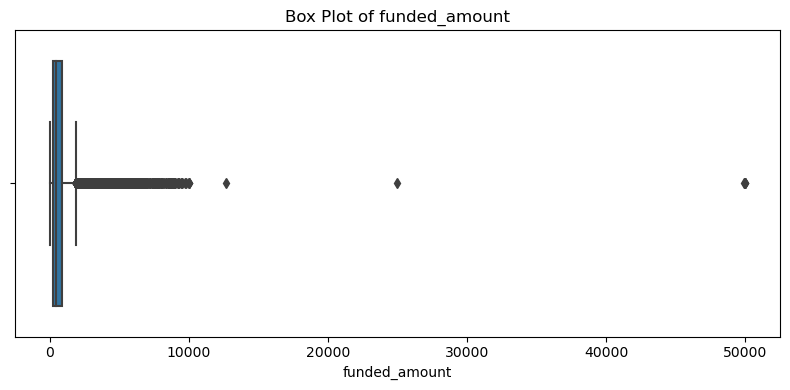

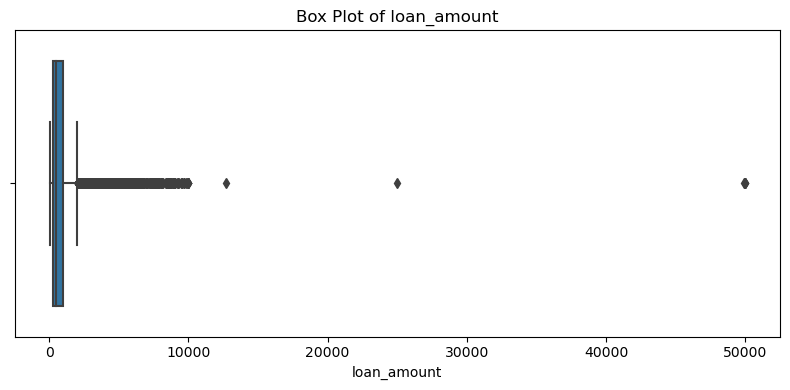

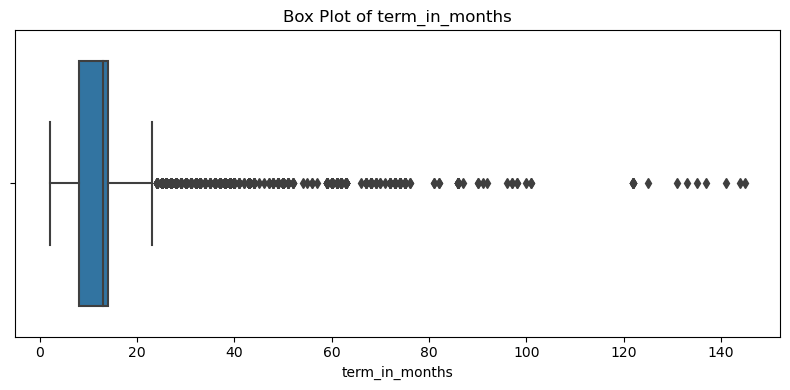

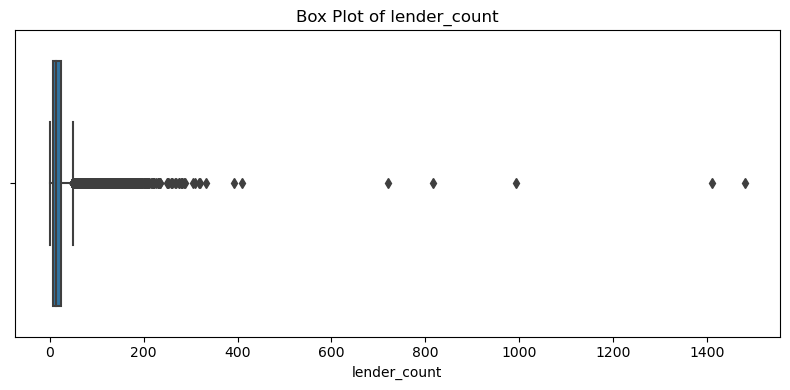

In [203]:
numeric_columns = ['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']

# Loop through and plot each boxplot
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [205]:
num_cols = ['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Count outliers
    lower_outliers = df[df[col] < lower_limit].shape[0]
    upper_outliers = df[df[col] > upper_limit].shape[0]
    total_outliers = lower_outliers + upper_outliers
    
    outlier_summary[col] = {
        'Lower Outliers': lower_outliers,
        'Upper Outliers': upper_outliers,
        'Total Outliers': total_outliers,
        'Total Rows': df.shape[0],
        'Percentage': round(total_outliers / df.shape[0] * 100, 2)
    }

# Display the result
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)

                Lower Outliers  Upper Outliers  Total Outliers  Total Rows  \
funded_amount              0.0          2633.0          2633.0     32752.0   
loan_amount                0.0          2448.0          2448.0     32752.0   
term_in_months             0.0          2952.0          2952.0     32752.0   
lender_count               0.0          2590.0          2590.0     32752.0   

                Percentage  
funded_amount         8.04  
loan_amount           7.47  
term_in_months        9.01  
lender_count          7.91  


In [206]:
columns = ['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df

for col in columns:
    df = cap_outliers(df, col)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32752 entries, 1242201 to 931675
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   funded_amount       32752 non-null  int64  
 1   loan_amount         32752 non-null  int64  
 2   sector              32752 non-null  object 
 3   country             32752 non-null  object 
 4   partner_id          32752 non-null  float64
 5   term_in_months      32752 non-null  int64  
 6   lender_count        32752 non-null  float64
 7   borrower_genders    32752 non-null  object 
 8   repayment_interval  32752 non-null  object 
 9   date                32752 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.7+ MB


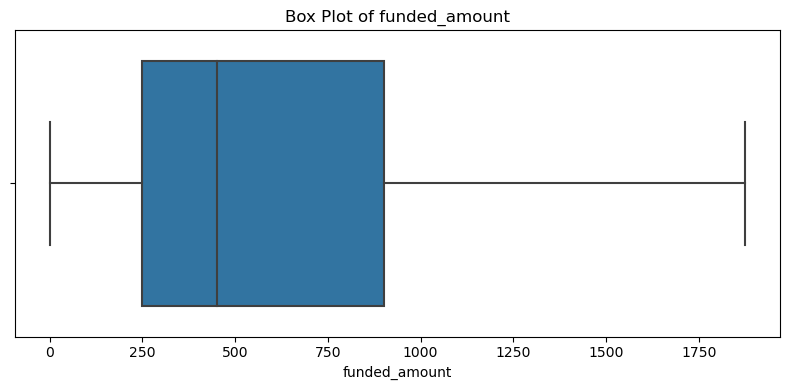

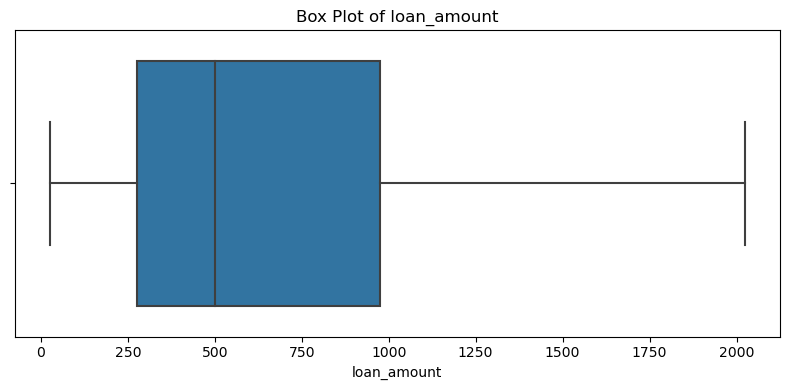

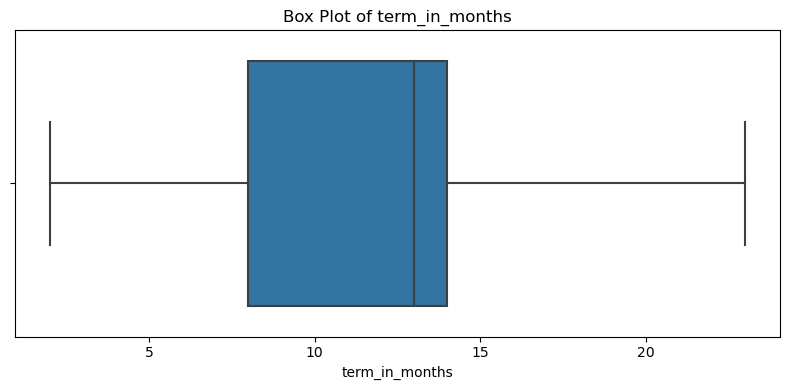

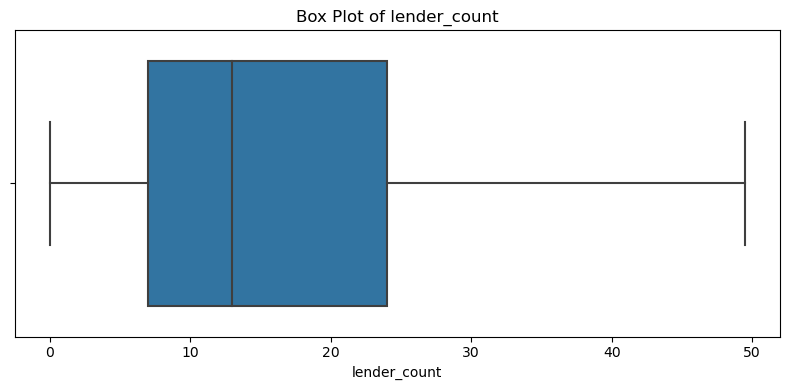

In [208]:
numeric_columns = ['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']

# Loop through and plot each boxplot
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [209]:
df['unfunded_amount'] = df['loan_amount'] - df['funded_amount']

In [210]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [211]:
df

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date,unfunded_amount
id,,,,,,,,,,,
1242201,500,500,Agriculture,Pakistan,245.0,14,14.0,female,monthly,2017-02-20,0
1165778,325,325,Agriculture,Philippines,145.0,14,13.0,female,irregular,2016-10-11,0
1123052,800,800,Agriculture,Ecuador,159.0,14,29.0,female,bullet,2016-07-25,0
1312344,425,425,Agriculture,Philippines,136.0,8,1.0,female,irregular,2017-06-02,0
861422,275,275,Agriculture,Kenya,133.0,12,11.0,female,monthly,2015-03-25,0
...,...,...,...,...,...,...,...,...,...,...,...
886976,500,500,Wholesale,Pakistan,247.0,14,18.0,female,monthly,2015-05-18,0
1017003,300,300,Wholesale,Pakistan,247.0,12,12.0,female,irregular,2016-02-02,0
831649,225,225,Wholesale,Pakistan,421.0,14,9.0,female,monthly,2015-01-23,0


In [212]:
def encode_genders(gender_str):
    if pd.isna(gender_str) or gender_str.strip() == '':
        return 'unknown'
    genders = [g.strip().lower() for g in gender_str.split(',')]
    unique_genders = set(genders)
    
    if unique_genders == {'female'}:
        return 'female'
    elif unique_genders == {'male'}:
        return 'male'
    elif unique_genders == {'male', 'female'}:
        return 'mixed'
    else:
        return 'unknown'

df['borrower_genders'] = df['borrower_genders'].apply(encode_genders)

In [213]:
print(df['borrower_genders'].value_counts())

female    23841
male       6862
mixed      2049
Name: borrower_genders, dtype: int64


In [214]:
df.head(-10)

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date,unfunded_amount
id,,,,,,,,,,,
1242201,500,500,Agriculture,Pakistan,245.0,14,14.0,female,monthly,2017-02-20,0
1165778,325,325,Agriculture,Philippines,145.0,14,13.0,female,irregular,2016-10-11,0
1123052,800,800,Agriculture,Ecuador,159.0,14,29.0,female,bullet,2016-07-25,0
1312344,425,425,Agriculture,Philippines,136.0,8,1.0,female,irregular,2017-06-02,0
861422,275,275,Agriculture,Kenya,133.0,12,11.0,female,monthly,2015-03-25,0
...,...,...,...,...,...,...,...,...,...,...,...
723415,250,250,Wholesale,Kenya,138.0,5,10.0,female,irregular,2014-06-11,0
704555,1000,1000,Wholesale,Uganda,163.0,12,26.0,male,monthly,2014-04-30,0
707889,1150,1150,Wholesale,Philippines,123.0,8,45.0,male,irregular,2014-05-09,0


In [215]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [216]:
df

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date,unfunded_amount,Year,Month,Day
id,,,,,,,,,,,,,,
1242201,500,500,Agriculture,Pakistan,245.0,14,14.0,female,monthly,2017-02-20,0,2017,2,20
1165778,325,325,Agriculture,Philippines,145.0,14,13.0,female,irregular,2016-10-11,0,2016,10,11
1123052,800,800,Agriculture,Ecuador,159.0,14,29.0,female,bullet,2016-07-25,0,2016,7,25
1312344,425,425,Agriculture,Philippines,136.0,8,1.0,female,irregular,2017-06-02,0,2017,6,2
861422,275,275,Agriculture,Kenya,133.0,12,11.0,female,monthly,2015-03-25,0,2015,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886976,500,500,Wholesale,Pakistan,247.0,14,18.0,female,monthly,2015-05-18,0,2015,5,18
1017003,300,300,Wholesale,Pakistan,247.0,12,12.0,female,irregular,2016-02-02,0,2016,2,2
831649,225,225,Wholesale,Pakistan,421.0,14,9.0,female,monthly,2015-01-23,0,2015,1,23


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32752 entries, 1242201 to 931675
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   funded_amount       32752 non-null  int64         
 1   loan_amount         32752 non-null  int64         
 2   sector              32752 non-null  object        
 3   country             32752 non-null  object        
 4   partner_id          32752 non-null  float64       
 5   term_in_months      32752 non-null  int64         
 6   lender_count        32752 non-null  float64       
 7   borrower_genders    32752 non-null  object        
 8   repayment_interval  32752 non-null  object        
 9   date                32752 non-null  datetime64[ns]
 10  unfunded_amount     32752 non-null  int64         
 11  Year                32752 non-null  int64         
 12  Month               32752 non-null  int64         
 13  Day                 32752 non-null  int

In [220]:
df['lender_count'] = df['lender_count'].astype(int)
df['partner_id'] = df['partner_id'].astype(int)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32752 entries, 1242201 to 931675
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   funded_amount       32752 non-null  int64         
 1   loan_amount         32752 non-null  int64         
 2   sector              32752 non-null  object        
 3   country             32752 non-null  object        
 4   partner_id          32752 non-null  int32         
 5   term_in_months      32752 non-null  int64         
 6   lender_count        32752 non-null  int32         
 7   borrower_genders    32752 non-null  object        
 8   repayment_interval  32752 non-null  object        
 9   date                32752 non-null  datetime64[ns]
 10  unfunded_amount     32752 non-null  int64         
 11  Year                32752 non-null  int64         
 12  Month               32752 non-null  int64         
 13  Day                 32752 non-null  int

### Which sectors receive the highest amount of funding, and how does this change over time?

In [225]:
sector_fund = df.groupby('sector')['funded_amount'].sum().sort_values(ascending=False)
sector_yearly = df.groupby(['Year' , 'sector'])['funded_amount'].sum().reset_index()

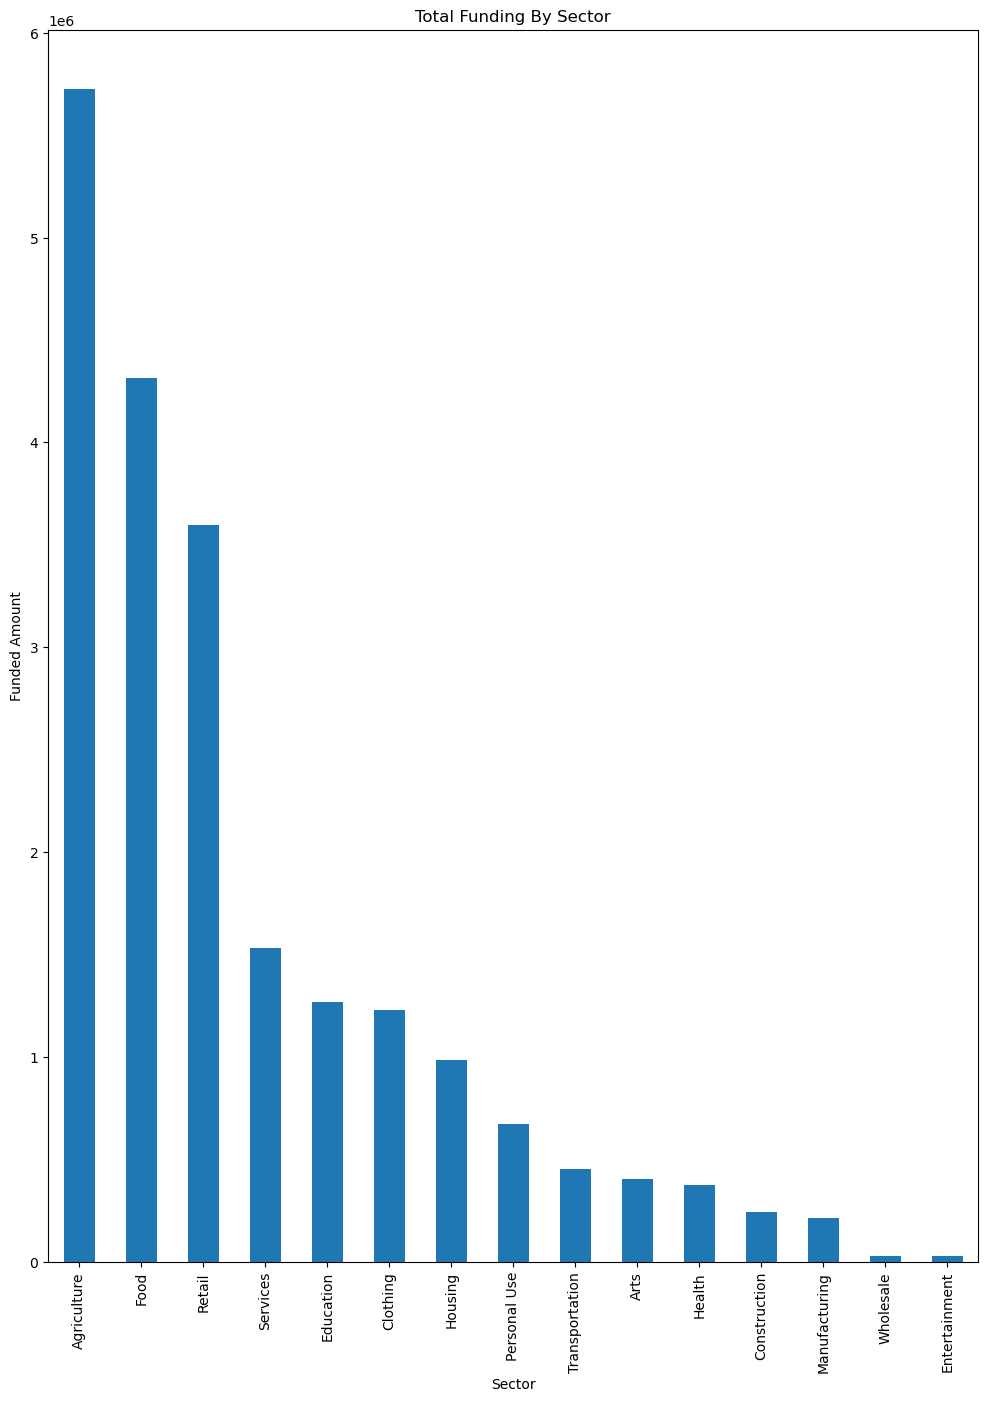

In [228]:
sector_fund.plot(kind='bar' , figsize=(12,16) , title='Total Funding By Sector')
plt.ylabel('Funded Amount')
plt.xlabel('Sector')
#plt.tight_layout()
plt.show()

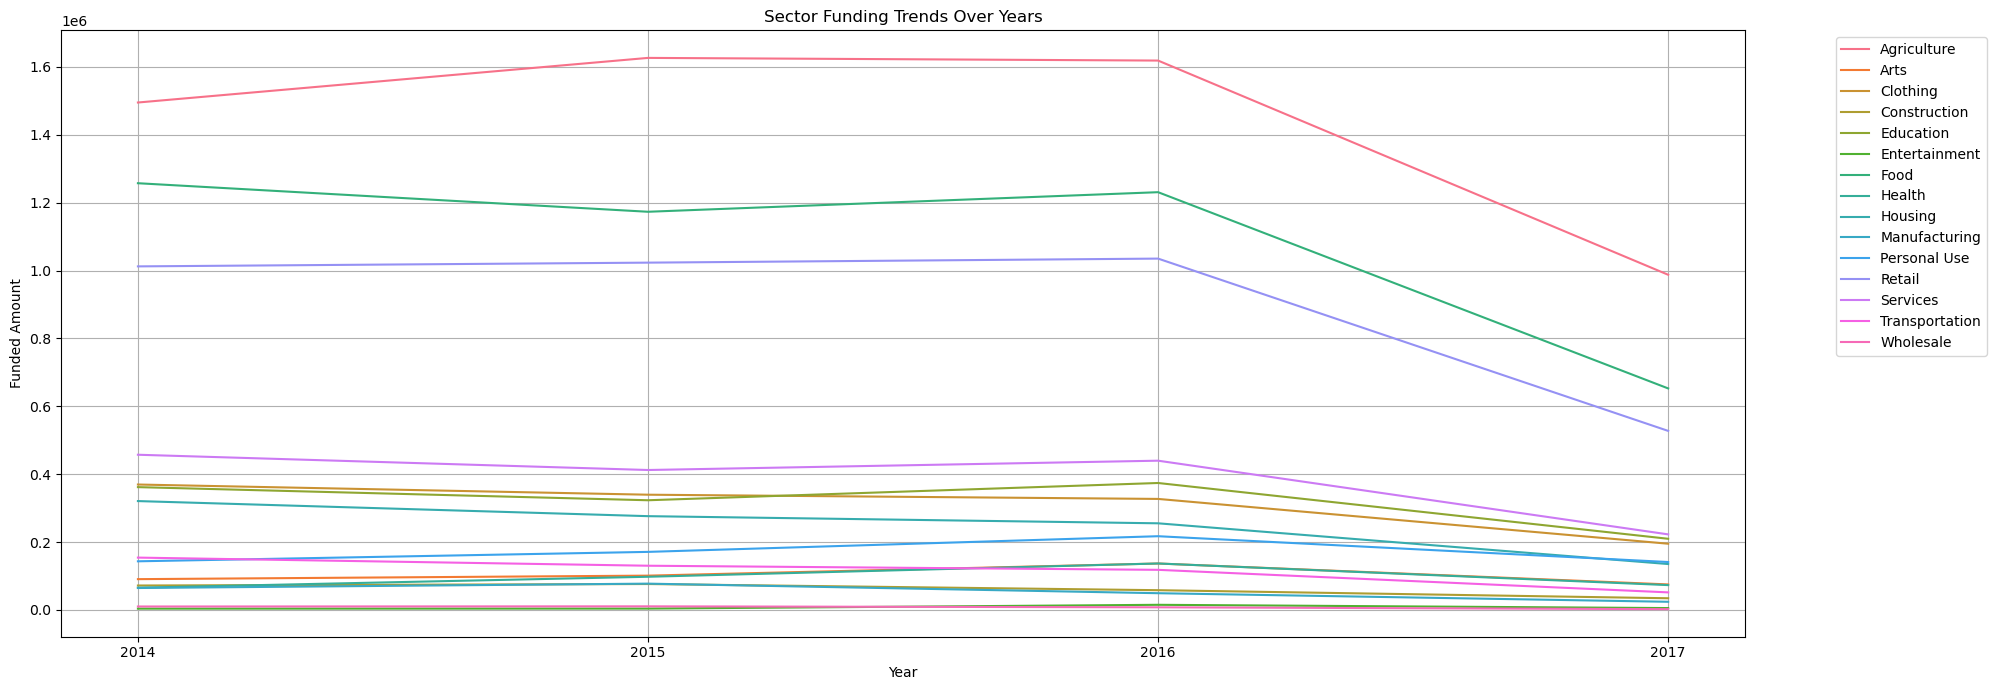

In [251]:
plt.figure(figsize=(20,7))
sns.lineplot(data=sector_yearly, x='Year', y='funded_amount', hue='sector')
plt.title('Sector Funding Trends Over Years')
plt.ylabel('Funded Amount')
plt.xlabel('Year')
plt.xticks(ticks=sorted(sector_yearly['Year'].unique()))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

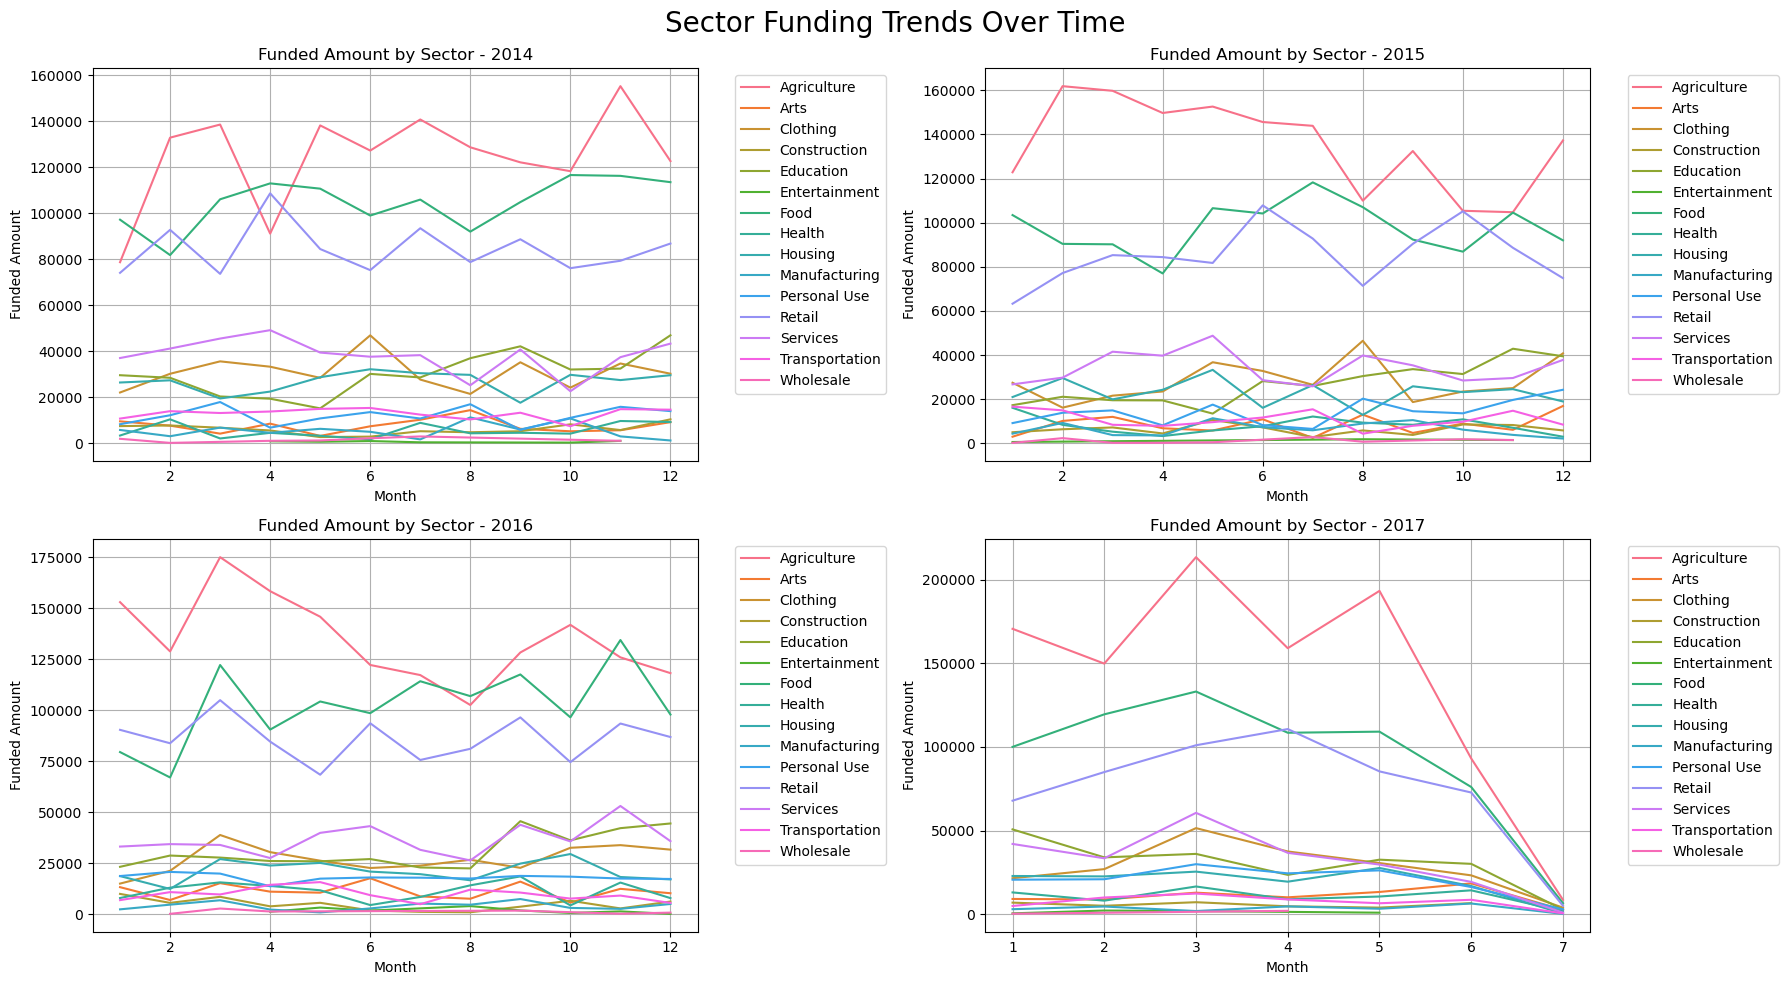

In [253]:
sector_monthly = df.groupby(['sector' , 'Year' , 'Month'])['funded_amount'].sum().reset_index()
years = sorted(sector_monthly['Year'].unique())

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Sector Funding Trends Over Time', fontsize=20)
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    yearly_data = sector_monthly[sector_monthly['Year'] == year]
    sns.lineplot(data=yearly_data, x='Month', y='funded_amount', hue='sector' , ax=ax)
    ax.set_title(f'Funded Amount by Sector - {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Funded Amount')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)
    
plt.tight_layout()
plt.show()

In [261]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

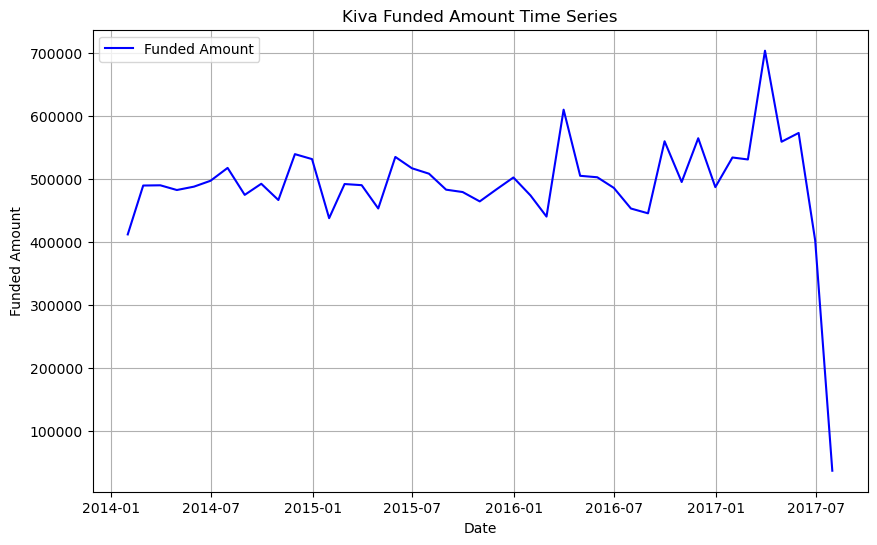

In [262]:
#  Visualize the time series for the funded amount
plt.figure(figsize=(10, 6))
funded_amount_monthly = df.groupby('date')['funded_amount'].sum().resample('M').sum()
plt.plot(funded_amount_monthly.index, funded_amount_monthly, label='Funded Amount', color='blue')
plt.title('Kiva Funded Amount Time Series')
plt.xlabel('Date')
plt.ylabel('Funded Amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()

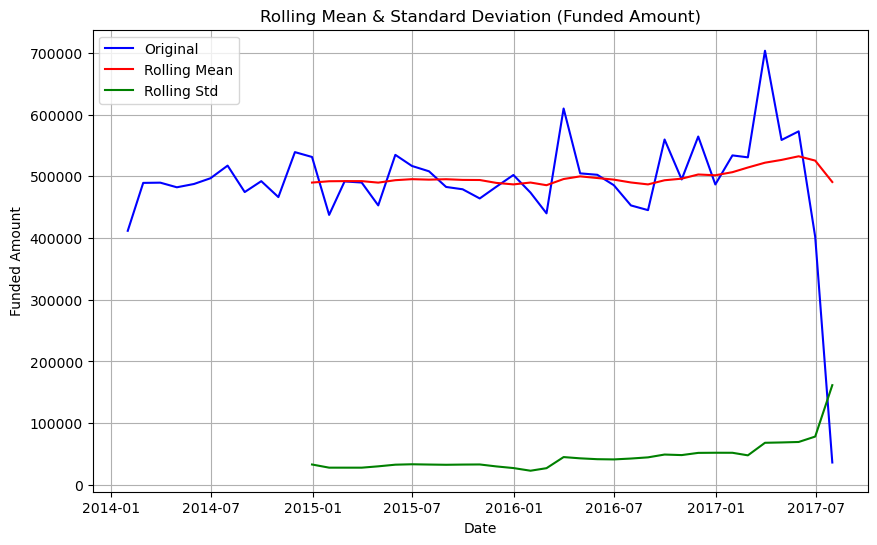

ADF Statistic: -3.65253906814185
p-value: 0.004832483399498653
Critical Values:
	1%: -3.639224104416853
	5%: -2.9512301791166293
	10%: -2.614446989619377


In [264]:
#  Stationarize the funded amount series
def stationarize_series(series):
   
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

  
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation (Funded Amount)')
    plt.xlabel('Date')
    plt.ylabel('Funded Amount')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

   
    result = adfuller(series)  
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')


stationarize_series(funded_amount_monthly)

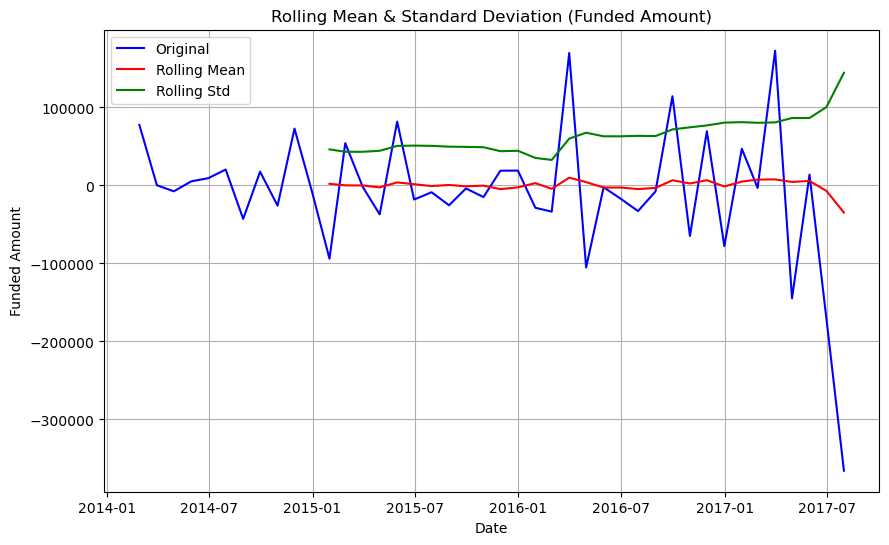

ADF Statistic: -4.351699855871759
p-value: 0.0003610356847268368
Critical Values:
	1%: -3.661428725118324
	5%: -2.960525341210433
	10%: -2.6193188033298647


In [265]:
# Apply first-order differencing to make the series more stationary
stationarize_series(funded_amount_monthly.diff().dropna())

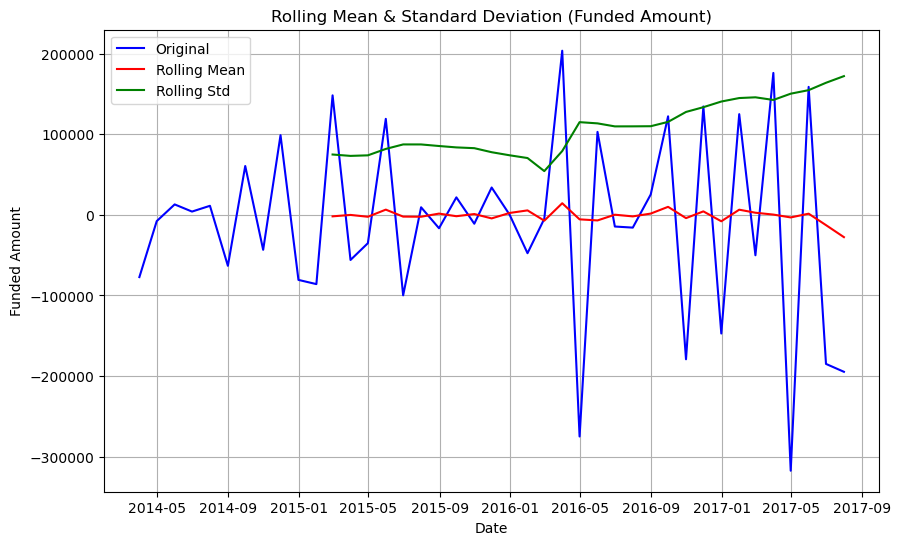

ADF Statistic: -1.3513508678630457
p-value: 0.6053643825176097
Critical Values:
	1%: -3.6699197407407405
	5%: -2.9640707407407407
	10%: -2.621171111111111


In [266]:
# Apply double differencing to Kiva funded amount series
stationarize_series(funded_amount_monthly.diff().diff().dropna())

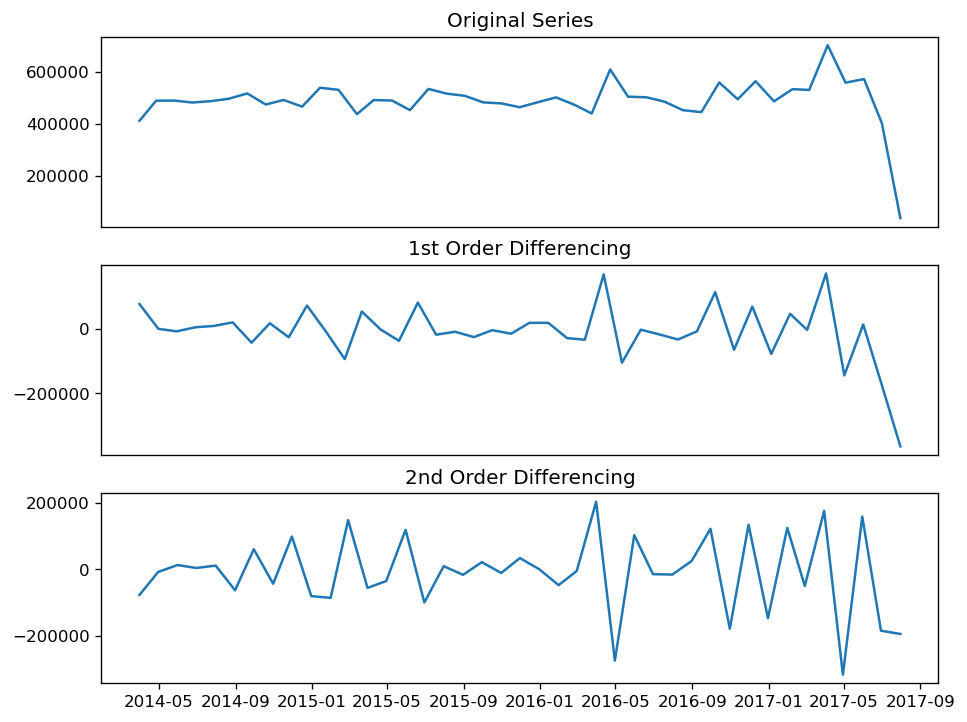

In [267]:
# Finding the value of the d parameter for your Kiva funded amount
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(funded_amount_monthly); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
ax2.plot(funded_amount_monthly.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
ax3.plot(funded_amount_monthly.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

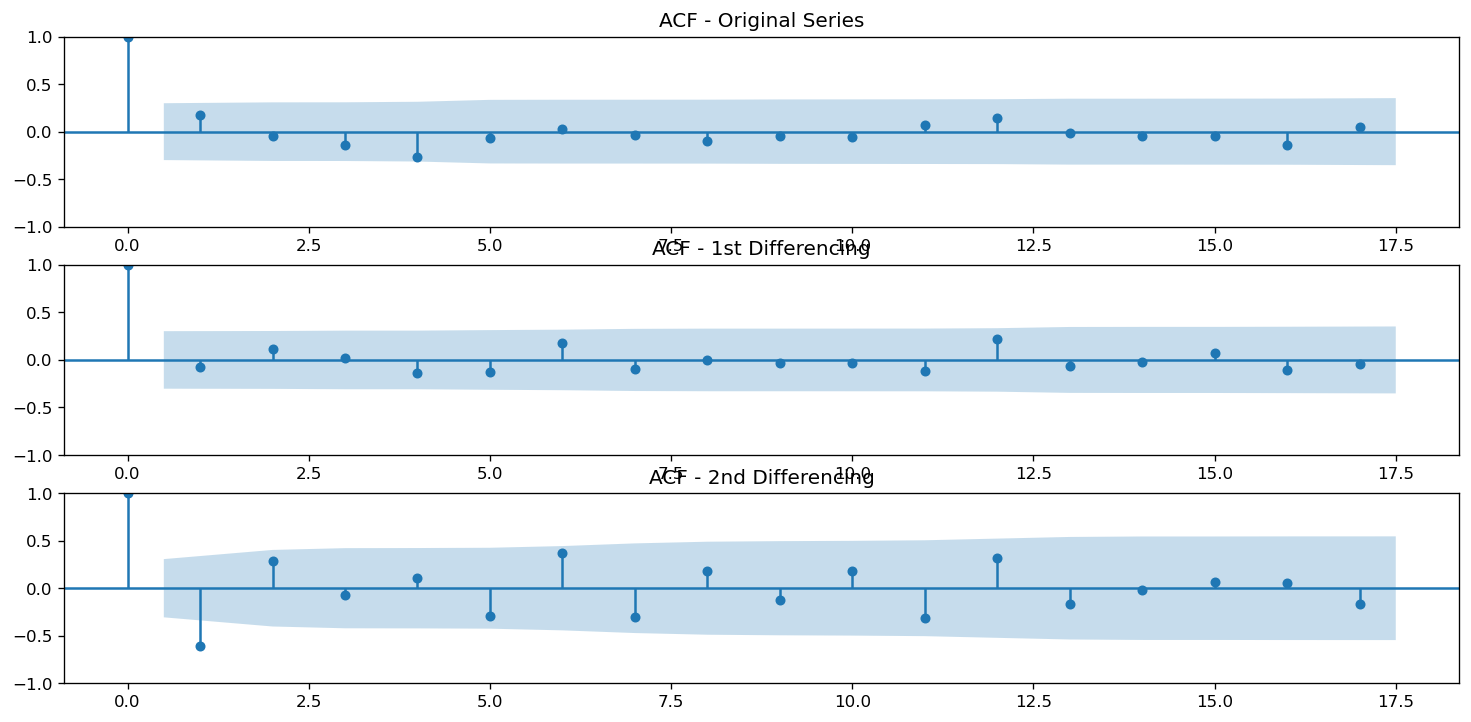

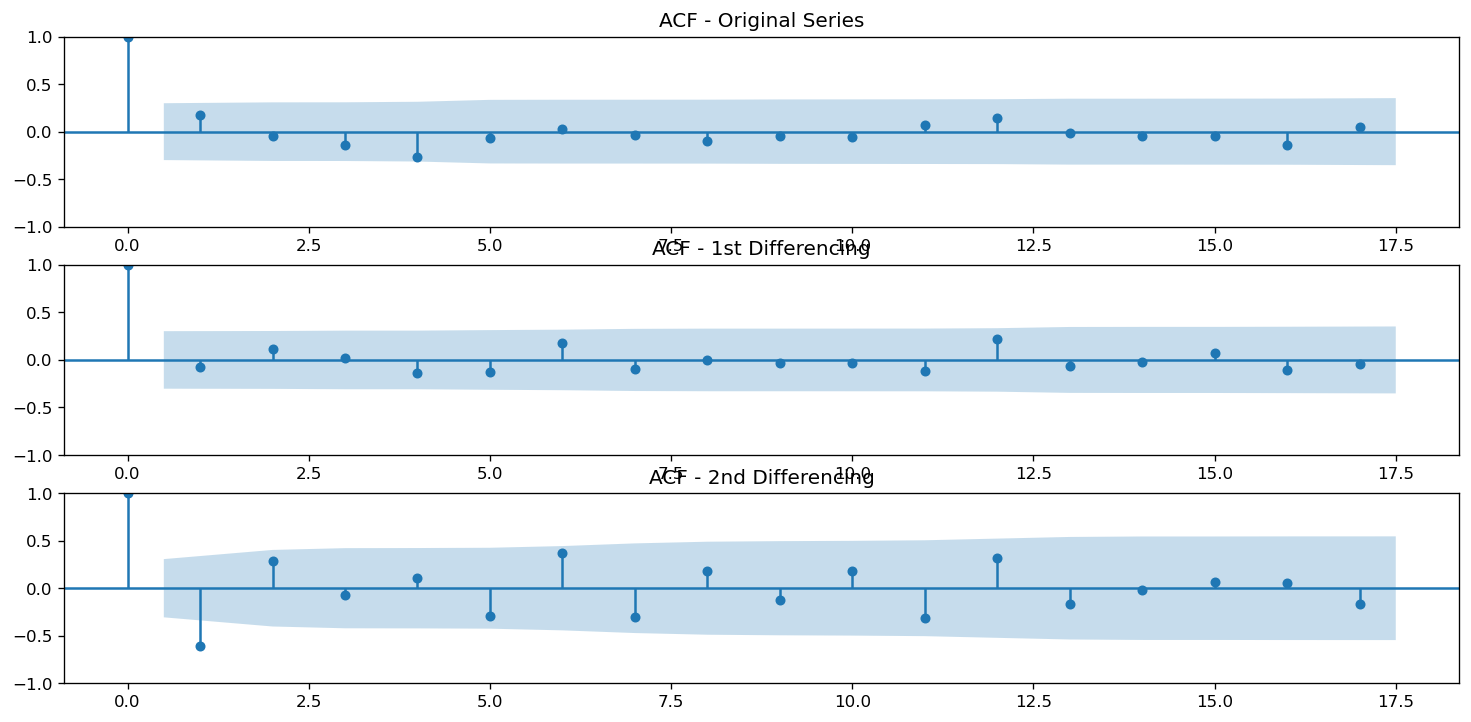

In [272]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 7))
plot_acf(funded_amount_monthly, ax=ax1, title='ACF - Original Series')
plot_acf(funded_amount_monthly.diff().dropna(), ax=ax2, title='ACF - 1st Differencing')
plot_acf(funded_amount_monthly.diff().diff().dropna(), ax=ax3, title='ACF - 2nd Differencing')

C:\Users\marie\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


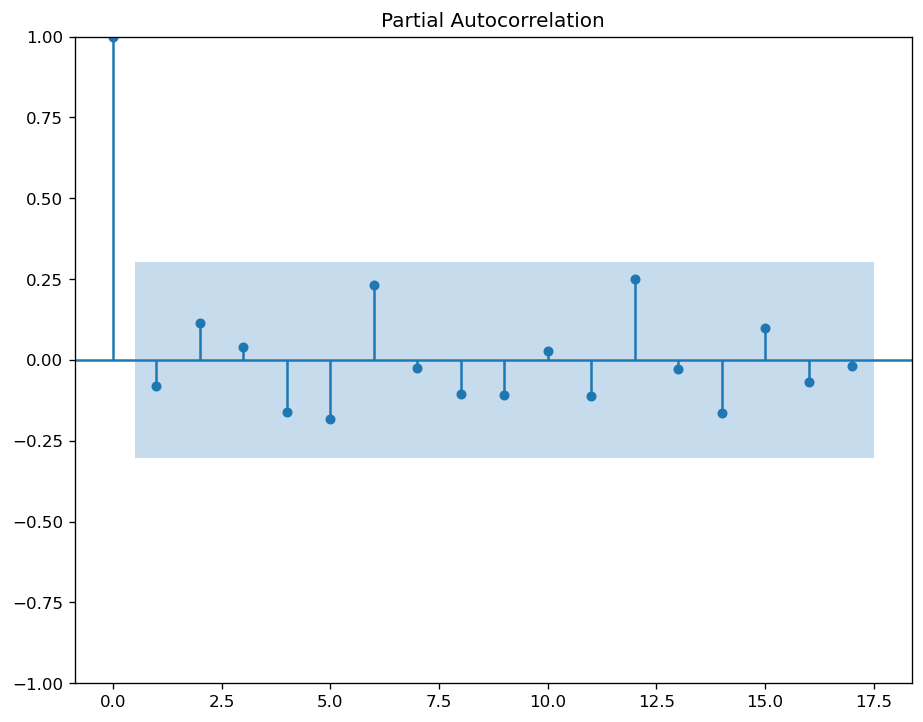

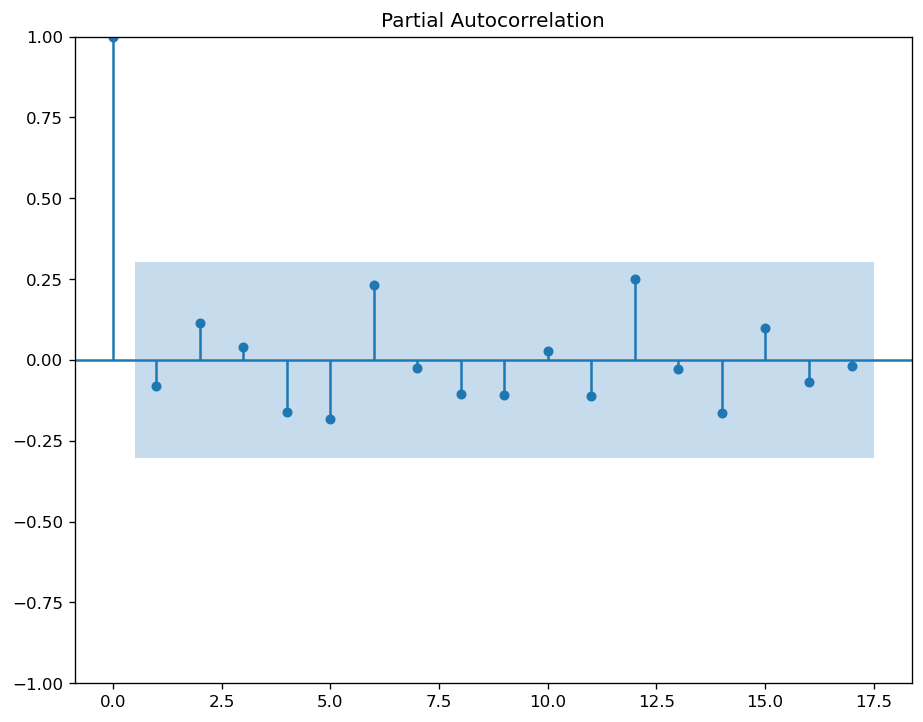

In [273]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(funded_amount_monthly.diff().dropna())

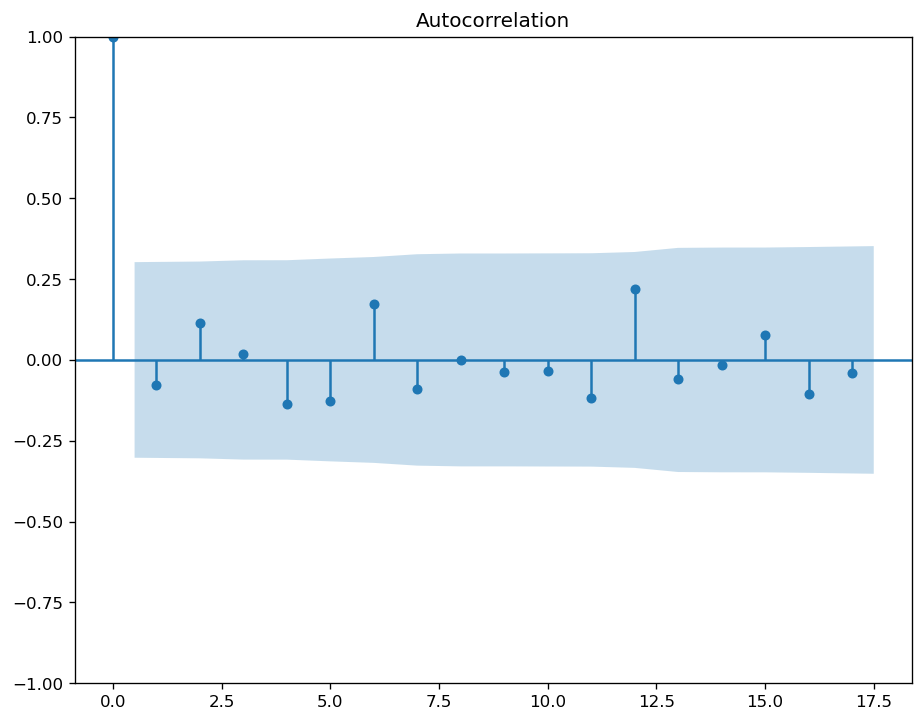

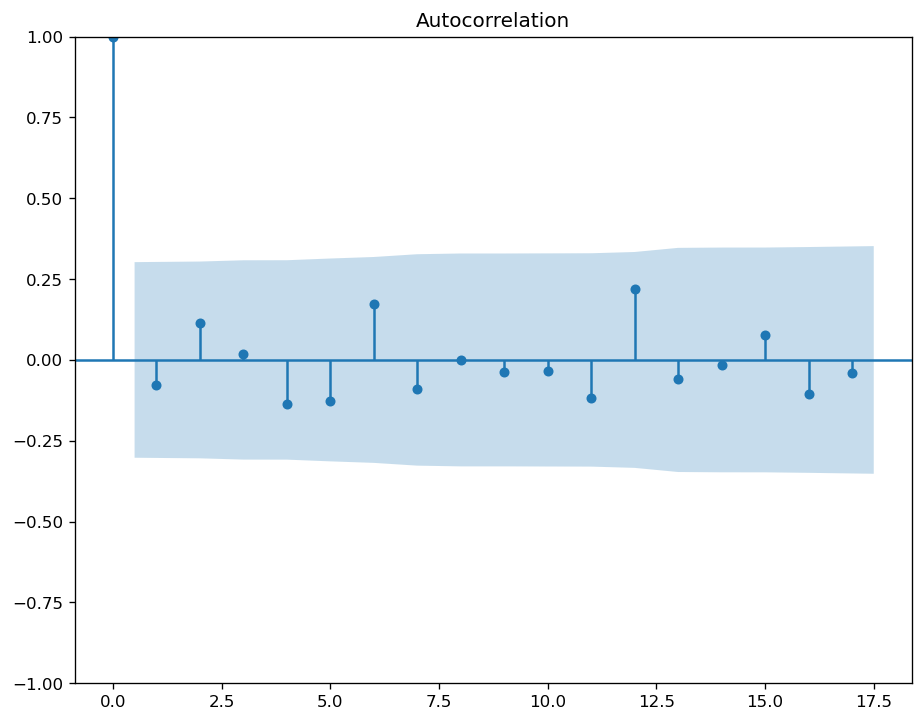

In [274]:
plot_acf(funded_amount_monthly.diff().dropna())

In [275]:
# Use the current ARIMA model (statsmodels >= 0.12.0)
from statsmodels.tsa.arima.model import ARIMA  # Note the dot between 'arima' and 'model'

# Build and fit the model (same parameters)
model = ARIMA(funded_amount_monthly, order=(1,1,1))
arima_model = model.fit()

# Generate predictions
forecast = arima_model.predict()

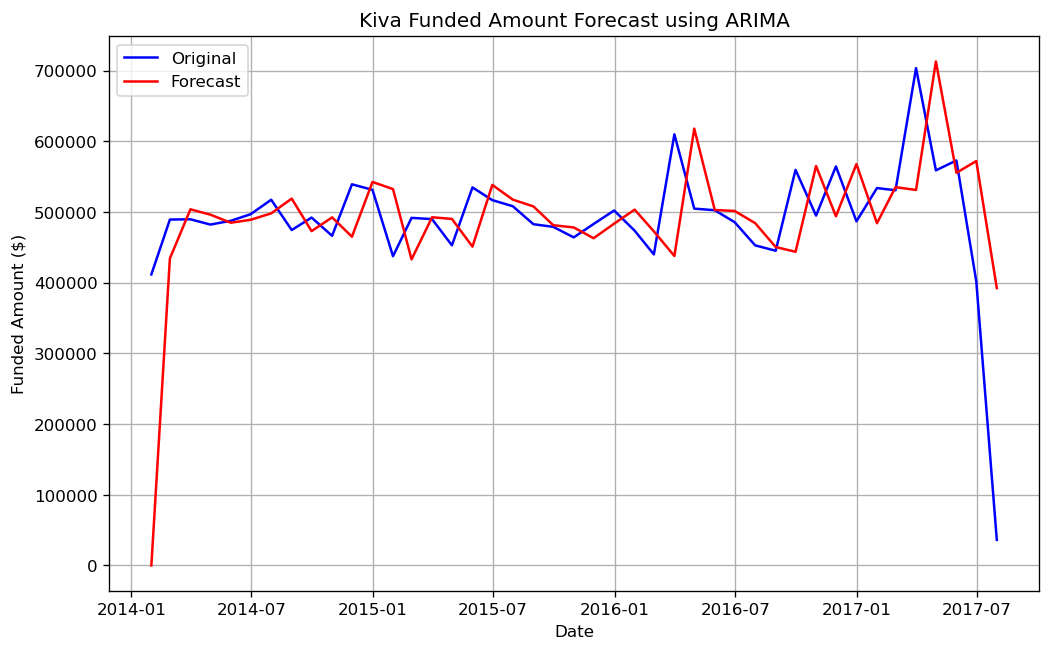

In [276]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(funded_amount_monthly.index, funded_amount_monthly, label='Original', color='blue')
plt.plot(funded_amount_monthly.index, forecast, label='Forecast', color='red')
plt.title('Kiva Funded Amount Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Funded Amount ($)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [277]:
print(f"Your data ranges from {funded_amount_monthly.index.min()} to {funded_amount_monthly.index.max()}")

Your data ranges from 2014-01-31 00:00:00 to 2017-07-31 00:00:00


In [278]:
start_index = ' 2014-01-31'
end_index = '2017-07-31 '  


forecast = arima_model.predict(start=start_index, end=end_index, dynamic=False)

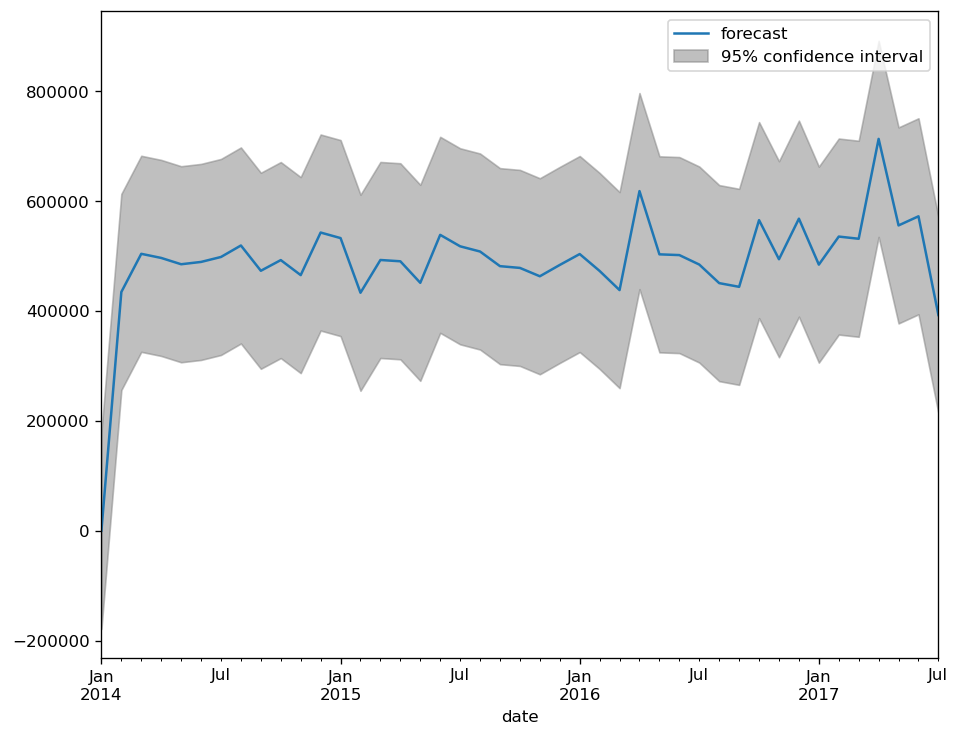

In [279]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(arima_model, dynamic=False) 
plt.show()

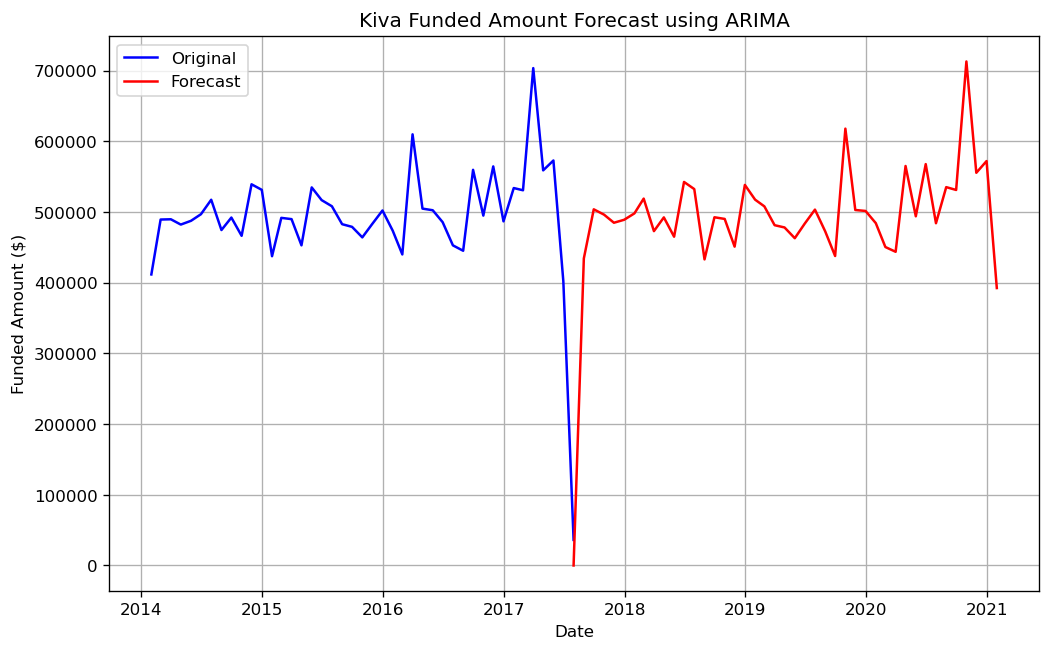

In [280]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(funded_amount_monthly.index, funded_amount_monthly, label='Original', color='blue')
plt.plot(pd.date_range(start=funded_amount_monthly.index[-1], periods=len(forecast), freq='M'), forecast, label='Forecast', color='red')
plt.title('Kiva Funded Amount Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Funded Amount ($)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Is there a correlation between the number of lenders and the funded loan amount?

In [254]:
correlation = df['funded_amount'].corr(df['lender_count'])
print("Correlation = ",correlation)

Correlation =  0.8603561493340578


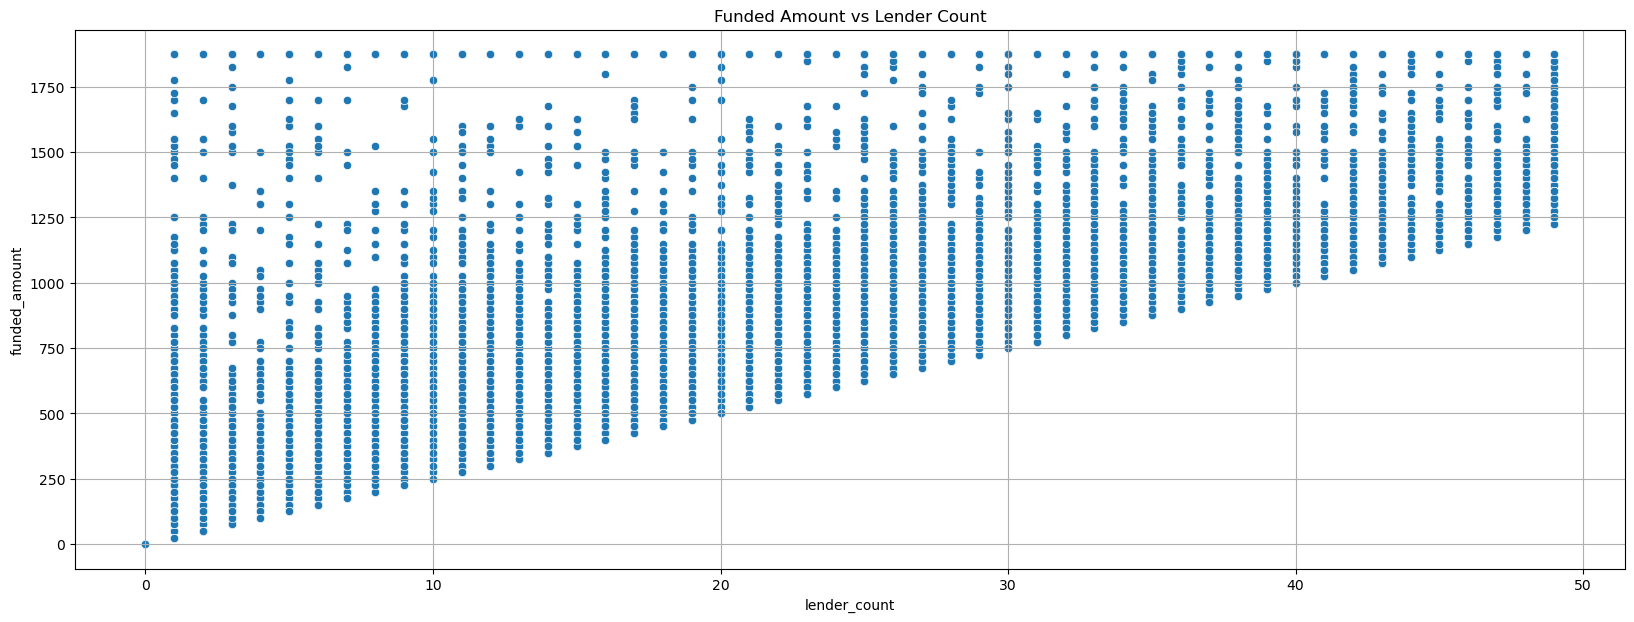

In [259]:
#Strong positive Correlation
plt.figure(figsize=(20,7))
sns.scatterplot(x='lender_count' , y= 'funded_amount' , data = df)
plt.title('Funded Amount vs Lender Count')
plt.grid(True)
plt.show()

### Can we predict future loan amounts based on historical data? 

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

### Linear Regression

In [294]:
X = df[['loan_amount', 'lender_count']]
y = df['funded_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)

         Actual    Predicted
id                          
1297198     175   185.796124
983872      175   185.796124
921536     1875  1875.289822
1272409     200   212.447298
662641      300   319.051992
Linear Regression
Mean Squared Error (MSE): 16817.65470430004
R-squared (R2) score: 0.9385596349232009


### Decision Tree

In [287]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Decision Tree")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)

         Actual    Predicted
id                          
1297198     175   175.000000
983872      175   175.000000
921536     1875  1873.123578
1272409     200   200.000000
662641      300   300.000000
Decision Tree
Mean Squared Error (MSE): 18392.23923720347
R-squared (R2) score: 0.932807165256837


### Random Forest

In [291]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Random Forest")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)

         Actual    Predicted
id                          
1297198     175   175.000000
983872      175   175.000000
921536     1875  1873.253364
1272409     200   200.000000
662641      300   300.000000
Random Forest
Mean Squared Error (MSE): 16222.498535800434
R-squared (R2) score: 0.9407339340697386
